In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyclist-2020q1/Divvy_Trips_2020_Q1 - Divvy_Trips_2020_Q1.csv


In [11]:
df=pd.read_csv('/kaggle/input/cyclist-2020q1/Divvy_Trips_2020_Q1 - Divvy_Trips_2020_Q1.csv')

In [12]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 8:37:16,2020-01-30 8:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426887 non-null  object 
 1   rideable_type       426887 non-null  object 
 2   started_at          426887 non-null  object 
 3   ended_at            426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB


In [14]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,426887.000000,426886.000000,426887.000000,426887.000000,426886.000000,426886.000000
mean,209.797799,209.337947,41.897846,-87.644157,41.897998,-87.644254
std,163.222889,163.198129,0.038080,0.022666,0.038315,0.022662
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700
25%,77.000000,77.000000,41.880300,-87.655000,41.880300,-87.655500
50%,176.000000,175.000000,41.890600,-87.639900,41.890600,-87.640800
75%,298.000000,297.000000,41.915700,-87.629500,41.916000,-87.629500
max,675.000000,675.000000,42.064900,-87.549400,42.064900,-87.549400


In [16]:
df['started']=pd.to_datetime(df['started_at'])
df['ended']=pd.to_datetime(df['ended_at'])

In [17]:
df.drop(columns=['started_at','ended_at'],inplace=True)

In [18]:
df.head(3)

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started,ended
0,EACB19130B0CDA4A,docked_bike,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,2020-01-21 20:06:59,2020-01-21 20:14:30
1,8FED874C809DC021,docked_bike,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,2020-01-30 14:22:39,2020-01-30 14:26:22
2,789F3C21E472CA96,docked_bike,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2020-01-09 19:29:26,2020-01-09 19:32:17


In [19]:
df['ride_length']=df['ended']-df['started']
df.head(3)

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started,ended,ride_length
0,EACB19130B0CDA4A,docked_bike,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,2020-01-21 20:06:59,2020-01-21 20:14:30,0 days 00:07:31
1,8FED874C809DC021,docked_bike,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,2020-01-30 14:22:39,2020-01-30 14:26:22,0 days 00:03:43
2,789F3C21E472CA96,docked_bike,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2020-01-09 19:29:26,2020-01-09 19:32:17,0 days 00:02:51


In [38]:
df['day_of_week']=df['started'].dt.day_name()
df.head(3)

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started,ended,ride_length,day_of_week
0,EACB19130B0CDA4A,docked_bike,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,2020-01-21 20:06:59,2020-01-21 20:14:30,0 days 00:07:31,Tuesday
1,8FED874C809DC021,docked_bike,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,2020-01-30 14:22:39,2020-01-30 14:26:22,0 days 00:03:43,Thursday
2,789F3C21E472CA96,docked_bike,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2020-01-09 19:29:26,2020-01-09 19:32:17,0 days 00:02:51,Thursday


In [40]:
#removing negative values from data
index_of_negative=df[df['ride_length']<'0 days 00:00:00'].index
df.drop(index_of_negative,inplace=True)

In [46]:
Q1=df['ride_length'].quantile(0.25)
Q3=df['ride_length'].quantile(0.75)
IQR=Q3-Q1


upper_bound= Q3+1.5*IQR

index_of_outlier=df[df['ride_length']>upper_bound].index
df.drop(index_of_outlier,inplace=True)


In [41]:
#before removing outlier
print(f'mean={df.ride_length.mean()}')
print(f'max={df.ride_length.max()}')
print(f'mode={df.day_of_week.mode()}')

mean=0 days 00:22:07.274995899
max=108 days 15:30:24
mode=0    Tuesday
Name: day_of_week, dtype: object


In [47]:
#after removing outlier
print(f'mean={df.ride_length.mean()}')
print(f'max={df.ride_length.max()}')
print(f'mode={df.day_of_week.mode()}')

mean=0 days 00:10:22.838269549
max=0 days 00:31:21
mode=0    Tuesday
Name: day_of_week, dtype: object


In [48]:
#after
df.groupby(['member_casual'])['ride_length'].mean()

member_casual
casual   0 days 00:14:35.911242426
member   0 days 00:09:59.672572762
Name: ride_length, dtype: timedelta64[ns]

In [42]:
df.groupby(['member_casual'])['ride_length'].mean()

member_casual
casual   0 days 01:36:00.905299505
member   0 days 00:12:40.626751090
Name: ride_length, dtype: timedelta64[ns]

In [43]:
df.groupby(['day_of_week'])['ride_length'].mean()

day_of_week
Friday      0 days 00:21:37.873538578
Monday      0 days 00:17:24.689190808
Saturday    0 days 00:32:22.441544274
Sunday      0 days 00:39:03.157561455
Thursday    0 days 00:20:01.385166921
Tuesday     0 days 00:16:40.136857272
Wednesday   0 days 00:17:02.611761506
Name: ride_length, dtype: timedelta64[ns]

In [49]:
#after
df.groupby(['day_of_week'])['ride_length'].mean()

day_of_week
Friday      0 days 00:09:55.737460421
Monday      0 days 00:09:56.105379271
Saturday    0 days 00:11:07.553770970
Sunday      0 days 00:12:28.175652132
Thursday    0 days 00:10:02.086801652
Tuesday     0 days 00:10:06.946060181
Wednesday   0 days 00:10:07.155630246
Name: ride_length, dtype: timedelta64[ns]

In [50]:
daily_ride_count=df.groupby(['day_of_week'])['ride_length'].count()

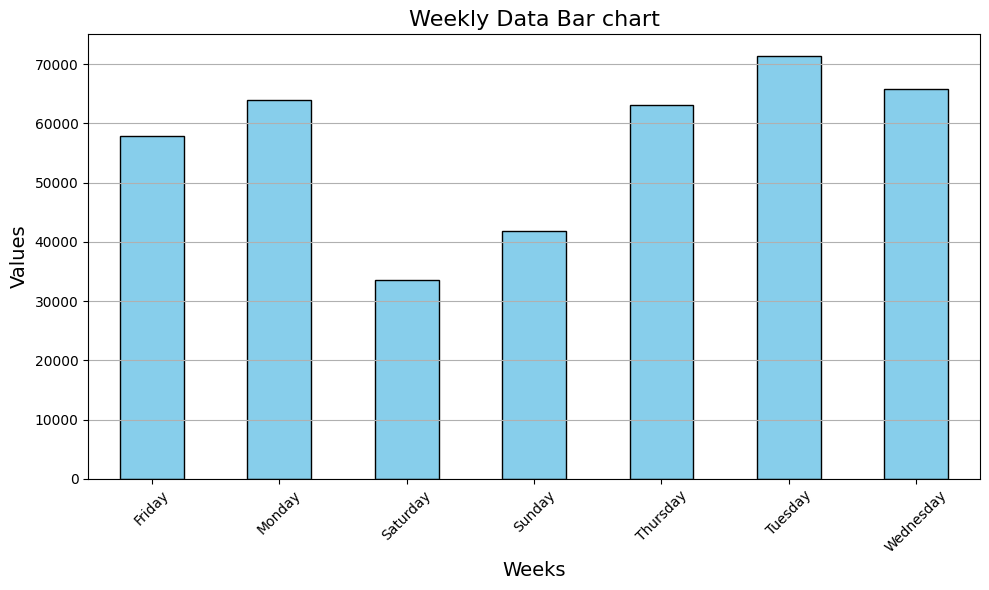

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
daily_ride_count.plot(kind='bar',color='skyblue',edgecolor='black')

plt.title('Weekly Data Bar chart', fontsize=16)
plt.xlabel('Weeks',fontsize=14)
plt.ylabel('Values',fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')


#show the plot
plt.tight_layout()
plt.show()

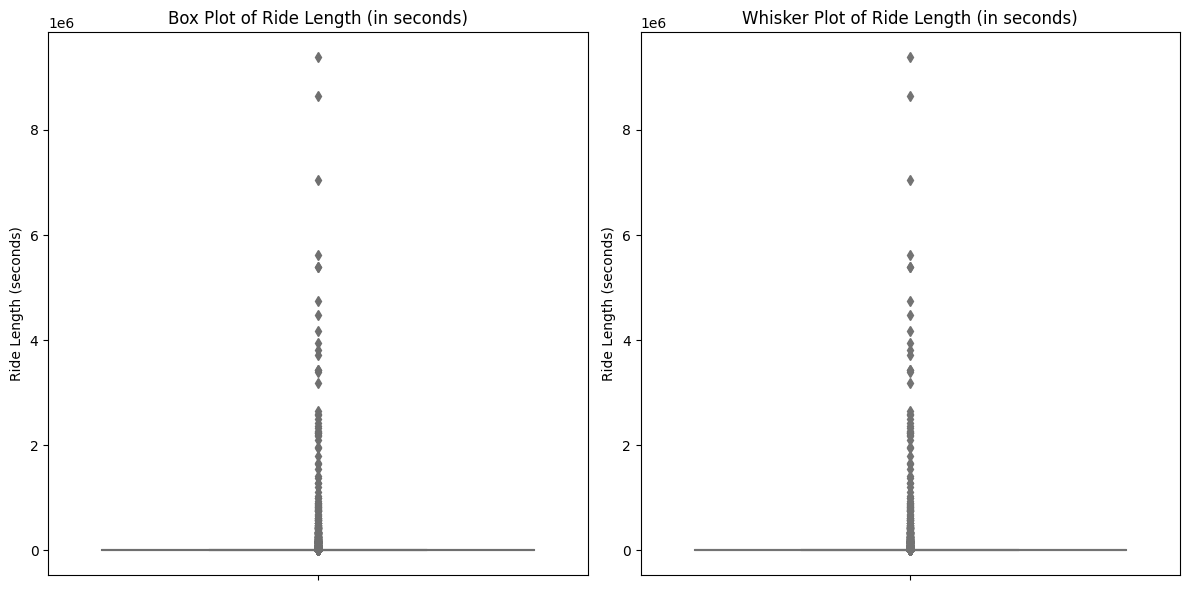

In [52]:
import seaborn as sns
# Convert 'ride_length' to total seconds for plotting
df2=pd.read_csv('/kaggle/input/cyclist-2020q1/Divvy_Trips_2020_Q1 - Divvy_Trips_2020_Q1.csv')
df2['started'] = pd.to_datetime(df2['started_at'])
df2['ended'] = pd.to_datetime(df2['ended_at'])

df2.drop(columns=['started_at','ended_at'], inplace=True)

df2['ride_length']=df2['ended']-df2['started']

df2['ride_length_seconds'] = df2['ride_length'].dt.total_seconds()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=df2['ride_length_seconds'], color='skyblue')
plt.title('Box Plot of Ride Length (in seconds)')
plt.ylabel('Ride Length (seconds)')

# Whisker plot (using the same box plot for whiskers)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(y=df2['ride_length_seconds'], color='lightgreen')
plt.title('Whisker Plot of Ride Length (in seconds)')
plt.ylabel('Ride Length (seconds)')

# Show the plots
plt.tight_layout()
plt.show()